In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# RQ1: Which technologies have been investigated in the last decade?

In [3]:
data = pd.read_csv('./data/500se.csv')
data.head()

,Cites,Authors,Title,Year,Source,Publisher,ArticleURL,CitesURL,GSRank,QueryDate,...,Volume,Issue,StartPage,EndPage,ECC,CitesPerYear,CitesPerAuthor,AuthorCount,Age,Abstract
0,32,"U Nikula, C Jurvanen, O Gotel, DC Gause",Empirical validation of the Classic Change Cur...,2010,… and Software Technology,Elsevier,https://www.sciencedirect.com/science/article/...,https://scholar.google.com/scholar?cites=37599...,1,2021-05-11 13:43:02,...,NaN,NaN,NaN,NaN,32,2.91,8,4,11,"Context New processes, tools, and practices ar..."
1,97,"C Lebeuf, MA Storey, A Zagalsky",Software bots,2017,IEEE Software,ieeexplore.ieee.org,https://ieeexplore.ieee.org/abstract/document/...,https://scholar.google.com/scholar?cites=15111...,2,2021-05-11 13:43:02,...,NaN,NaN,NaN,NaN,97,24.25,32,3,4,… Editor: Christof Ebert Vector Consulting Ser...
2,34,"SM Ogle, L Buendia, K Butterbach-Bahl…",Advancing national greenhouse gas inventories ...,2013,Environmental …,iopscience.iop.org,https://iopscience.iop.org/article/10.1088/174...,https://scholar.google.com/scholar?cites=33541...,3,2021-05-11 13:43:02,...,NaN,NaN,NaN,NaN,34,4.25,9,4,8,Developing countries face many challenges when...
3,2691,"B Kitchenham, OP Brereton, D Budgen…",Systematic literature reviews in software engi...,2009,… and software technology,Elsevier,https://www.sciencedirect.com/science/article/...,https://scholar.google.com/scholar?cites=14563...,4,2021-05-11 13:43:02,...,NaN,NaN,NaN,NaN,2691,224.25,673,4,12,Background In 2004 the concept of evidence-bas...
4,558,"A Brem, KI Voigt",Integration of market pull and technology push...,2009,Technovation,Elsevier,https://www.sciencedirect.com/science/article/...,https://scholar.google.com/scholar?cites=78811...,5,2021-05-11 13:43:02,...,NaN,NaN,NaN,NaN,558,46.50,279,2,12,"Within the framework of this paper, an extensi..."


In [4]:
def CreateTermDocMatrix(data,column):
    documents = []

    for text in data[column]:
        documents.append(text)
        
    count_vectorizer = CountVectorizer(stop_words='english',ngram_range = (1,2))
    sparse_matrix = count_vectorizer.fit_transform(data[column].values.astype('U'))
    print(1)

    doc_term_matrix = sparse_matrix.todense()
    df = pd.DataFrame(doc_term_matrix, columns=count_vectorizer.get_feature_names())
    df['PublishingYear'] = data['Year']
    returndf = df.groupby('PublishingYear').sum().transpose()
    return returndf

1
PublishingYear        2009  2010  2011  2012  2013  2014  2015  2016  2017  \
chongqing                0     0     0     0     0     0     0     0     4   
christof                 0     0     0     0     2     2     3     0     7   
christof ebert           0     0     0     0     2     2     3     0     7   
context                  2     8     8     4     9    15    16     5     6   
development             18    15    12    29    15    16    10     8     8   
ebert                    0     0     0     2     2     2     3     0     7   
ebert vector             0     0     0     0     2     2     2     0     4   
organizations            0     2     2     2     1     4     0     2     4   
page                     6     1     3     4     9     3     3     0     4   
practices                1     3     3     0     2     0     1     1     4   
software               106   103    88   136    96    90    85    52    42   
software development    15     9     6    14    11    13     6

(16, 13)

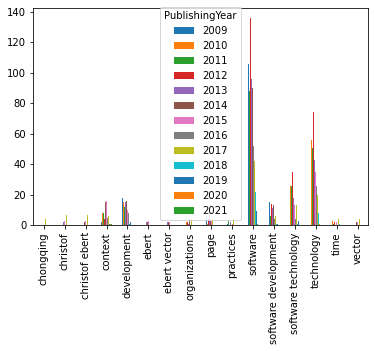

In [5]:
#Untersuchung Abstract

abstract = CreateTermDocMatrix(data,'Abstract')

abstract = abstract.fillna(0)

b = abstract.loc[abstract[2017] > 3] 

b.plot.bar()
print(b)
b.shape


1
PublishingYear        2009  2010  2011  2012  2013  2014  2015  2016  2017  \
agile                    1     5     4    10     0     4     1     2     4   
agile software           0     1     2     5     0     3     1     1     3   
based                    6     8     6     4     7     2     2     2     3   
development              9    15     8    16    10    15     6     4     6   
literature               3     2     1     2     4     8     5     4     3   
literature review        1     1     1     1     3     7     5     3     3   
process                  5     7     2     3     4     1     2     3     3   
review                   3     2     3     5     9     9     6    10     3   
software                58    59    49    67    54    58    48    36    18   
software development     7    12     4    15     9    12     5     3     6   
systematic               7     3     4     6    10    12     7     8     3   

PublishingYear        2018  2019  2020  2021  
agile         

(11, 13)

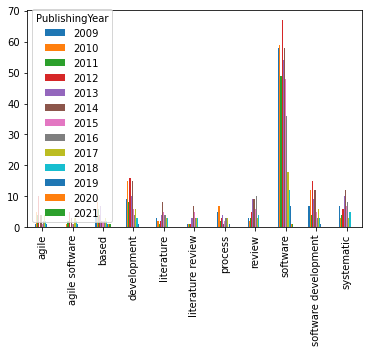

In [6]:
#Untersuchung Title
title = CreateTermDocMatrix(data,'Title')

b = title.loc[title[2017] > 2] 

b.plot.bar()
print(b)
b.shape
